In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

DỰ ĐOÁN TÍN HIỆU ECG

In [2]:
# Đọc file CSV vào DataFrame
df = pd.read_csv('./MIT-BIH/208_MLII.csv', header=None)
data=df.drop(columns=187)
data=data.values

In [3]:
train_size = 0.8
test_size = 1 - train_size

# Tính số lượng dòng cho tập train
num_train_samples = int(len(data) * train_size)

# Chia dữ liệu thành tập train và tập test
train_data = data[:num_train_samples]
test_data = data[num_train_samples:]

In [4]:
#Chia khung
window_input= 10
window_out=5

In [5]:
# Số lượng lặp qua dữ liệu
num_samples_train = len(train_data) - window_input - window_out + 1
num_samples_test = len(test_data) - window_input - window_out + 1

# Đối với tập train
# Tạo dữ liệu train từ cửa sổ trượt
X_train, y_train, X_test, y_test = [], [], [], []

for i in range(num_samples_train):
    X_window = data[i:i+window_input]
    y_window = data[i+window_input:i+window_input+window_out]

    X_train.append(X_window)
    y_train.append(y_window)



In [6]:
# Đối với tập test
for i in range(num_samples_test):
    X_window = data[i:i+window_input]
    y_window = data[i+window_input:i+window_input+window_out]

    X_test.append(X_window)
    y_test.append(y_window)

In [7]:
X_train= np.array(X_train)
y_train= np.array(y_train)
X_test= np.array(X_test)
y_test= np.array(y_test)

In [8]:
# Tạo một mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(10, 187)))  # Đặt input_shape phù hợp với kích thước của mảng X_train
model.add(Dense(5 * 187))  # Đặt lớp Dense phù hợp với kích thước của mảng y_train

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train, y_train.reshape(-1, 5 * 187), epochs=50, batch_size=16)

Epoch 1/50
93/93 [==============================] - 4s 12ms/step - loss: 0.0251
Epoch 2/50
93/93 [==============================] - 1s 9ms/step - loss: 0.0210
Epoch 3/50
93/93 [==============================] - 1s 9ms/step - loss: 0.0198
Epoch 4/50
93/93 [==============================] - 1s 8ms/step - loss: 0.0194
Epoch 5/50
93/93 [==============================] - 1s 11ms/step - loss: 0.0192
Epoch 6/50
93/93 [==============================] - 1s 6ms/step - loss: 0.0191
Epoch 7/50
93/93 [==============================] - 1s 6ms/step - loss: 0.0189
Epoch 8/50
93/93 [==============================] - 1s 5ms/step - loss: 0.0189
Epoch 9/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 10/50
93/93 [==============================] - 1s 6ms/step - loss: 0.0185
Epoch 11/50
93/93 [==============================] - 1s 6ms/step - loss: 0.0185
Epoch 12/50
93/93 [==============================] - 1s 7ms/step - loss: 0.0183
Epoch 13/50
93/93 [============================

In [10]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


12/12 [==============================] - 0s 2ms/step


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
# Độ đo Mean Squared Error (MSE)
mse = mean_squared_error(y_test.reshape(-1, 5 * 187), y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Độ đo R-squared (R2)
r2 = r2_score(y_test.reshape(-1, 5 * 187), y_pred)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.012263227745923177
R-squared (R2): 0.4137857369328678


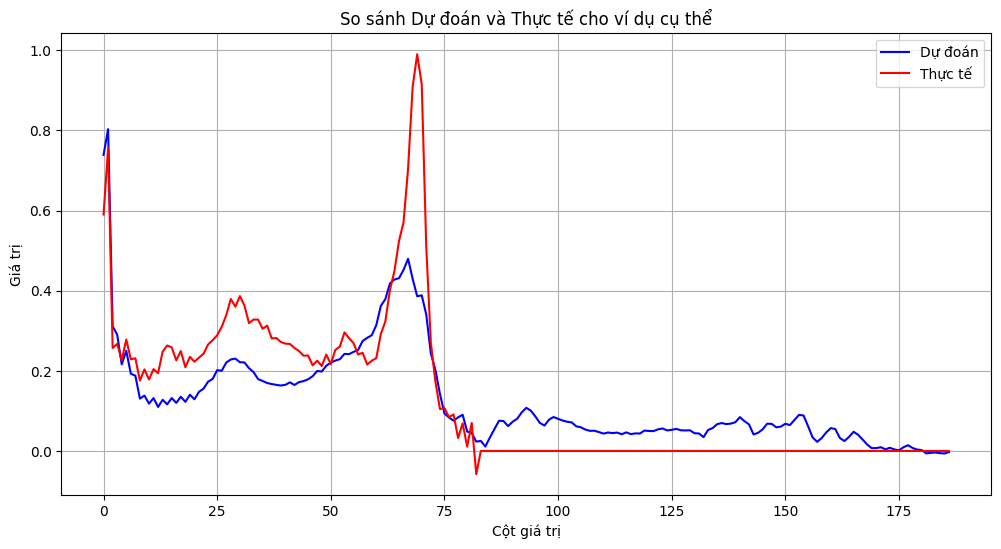

In [12]:
import matplotlib.pyplot as plt

# Chọn một ví dụ cụ thể để trực quan hóa
example_index = 3  # Thay đổi chỉ số ví dụ nếu cần

# Lấy giá trị dự đoán và giá trị thực tế tương ứng
y_pred_example = y_pred[example_index].reshape(5, 187)
y_test_example = y_test[example_index].reshape(5, 187)

# Vẽ biểu đồ cho giá trị dự đoán (màu xanh) và giá trị thực tế (màu đỏ)
plt.figure(figsize=(12, 6))
plt.plot(y_pred_example[0], label='Dự đoán', color='blue')
plt.plot(y_test_example[0], label='Thực tế', color='red')
plt.xlabel('Cột giá trị')
plt.ylabel('Giá trị')
plt.title('So sánh Dự đoán và Thực tế cho ví dụ cụ thể')
plt.legend()
plt.grid()
plt.show()


PHÂN LỚP TÍN HIỆU ECG TƯƠNG LAI

In [13]:
# Đọc file CSV vào DataFrame
data2=df.values

In [14]:
train_size = 0.8
test_size = 1 - train_size

# Tính số lượng dòng cho tập train
num_train_samples = int(len(data2) * train_size)

# Chia dữ liệu thành tập train và tập test
train_data2 = data2[:num_train_samples]
test_data2 = data2[num_train_samples:]

In [15]:
X_train_class= data2[:,:-1]
y_train_class= data2[:,-1].astype(int)

In [16]:
num_samples_test2 = len(test_data2) - window_input - window_out + 1
X_test2, y_test2 = [], []
# Đối với tập test
for i in range(num_samples_test2):
    X_window = data2[i:i+window_input]
    y_window = data2[i+window_input:i+window_input+window_out]

    X_test2.append(X_window)
    y_test2.append(y_window)

In [17]:
y_test2=np.array(y_test2)

In [18]:
y_test2.shape


(361, 5, 188)

In [19]:
y_test2= np.array(y_test2)
y_test2=y_test2.reshape(y_test2.shape[0]*5,188)

In [20]:
#y_test
y_test_class=y_test2[:,-1].astype(int)

In [21]:
np.unique(y_test_class)

array([0, 2, 3])

In [22]:
#Dữ liệu dự đoán (X_test)
X_predict=y_pred.astype(float)

In [23]:
X_predict_test=X_predict.reshape(y_test2.shape[0],187)

In [24]:
print(X_train_class.shape)
print(y_train_class.shape)
print(X_predict_test.shape)
print(y_test_class.shape)

(1875, 187)
(1875,)
(1805, 187)
(1805,)


In [25]:
np.unique(y_train_class)

array([0, 1, 2, 3])

In [26]:
# Bước: Xây dựng mô hình CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

input_shape = (X_train_class.shape[1], 1)

model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(16, activation='relu'))
model_cnn.add(Dense(5, activation='softmax'))
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model_cnn.fit(X_train_class.reshape(X_train_class.shape[0], X_train_class.shape[1], 1), y_train_class, epochs=10, batch_size=32)

Epoch 1/10
59/59 [==============================] - 2s 14ms/step - loss: 0.7522 - accuracy: 0.7653
Epoch 2/10
59/59 [==============================] - 1s 14ms/step - loss: 0.4213 - accuracy: 0.8560
Epoch 3/10
59/59 [==============================] - 1s 13ms/step - loss: 0.3440 - accuracy: 0.8976
Epoch 4/10
59/59 [==============================] - 1s 14ms/step - loss: 0.3154 - accuracy: 0.9013
Epoch 5/10
59/59 [==============================] - 1s 14ms/step - loss: 0.2720 - accuracy: 0.9120
Epoch 6/10
59/59 [==============================] - 1s 12ms/step - loss: 0.2442 - accuracy: 0.9120
Epoch 7/10
59/59 [==============================] - 1s 12ms/step - loss: 0.2188 - accuracy: 0.9269
Epoch 8/10
59/59 [==============================] - 1s 14ms/step - loss: 0.2138 - accuracy: 0.9264
Epoch 9/10
59/59 [==============================] - 1s 15ms/step - loss: 0.1862 - accuracy: 0.9408
Epoch 10/10
59/59 [==============================] - 1s 15ms/step - loss: 0.1755 - accuracy: 0.9387


In [29]:
predictions = model_cnn.predict(X_predict_test)
y_pred_classes = np.argmax(predictions, axis=1)

57/57 [==============================] - 0s 6ms/step


In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_class, y_pred_classes)
accuracy

0.7988919667590028

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_classes)
cm

array([[1333,    1,   37],
       [  79,    2,    3],
       [ 243,    0,  107]], dtype=int64)

In [32]:
import numpy as np

unique_values, counts = np.unique(y_pred_classes, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")


0: 1655
2: 3
3: 147


In [33]:
from sklearn.metrics import recall_score

sensitivity_class_0 = recall_score(y_test_class == 0, y_pred_classes == 0)
sensitivity_class_1 = recall_score(y_test_class == 1, y_pred_classes == 1)
sensitivity_class_2 = recall_score(y_test_class == 2, y_pred_classes == 2)
sensitivity_class_3 = recall_score(y_test_class == 3, y_pred_classes == 3)
sensitivity_class_4 = recall_score(y_test_class == 4, y_pred_classes == 4)


c:\Users\MSI GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


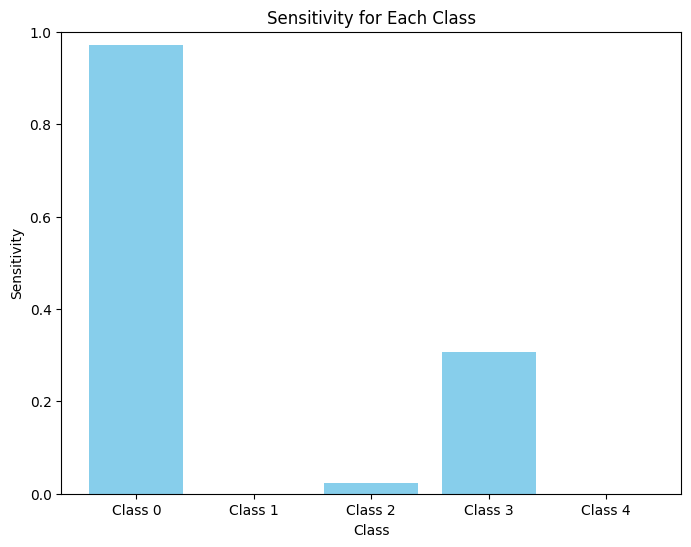

In [34]:
import matplotlib.pyplot as plt

# Sử dụng recall_score để tính sensitivity cho từng lớp
from sklearn.metrics import recall_score

# Giả sử bạn đã tính được sensitivity cho các lớp
sensitivity_scores = [sensitivity_class_0,sensitivity_class_1, sensitivity_class_2, sensitivity_class_3, sensitivity_class_4]

# Tên của các lớp
class_names = ['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(class_names, sensitivity_scores, color='skyblue')
plt.title('Sensitivity for Each Class')
plt.xlabel('Class')
plt.ylabel('Sensitivity')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1 để hiển thị độ nhạy từ 0% đến 100%
plt.show()
